# **Exploratory Data Analysis** 🔎📈

## **Mounting Google Drive**

In [1]:
# mount google drive

from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## **Import Library**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pd.set_option('display.max_columns', None)
plt.style.use('classic')

## **Import Data**

In [3]:
data_train = pd.read_csv(r'gdrive/MyDrive/PBI_Data Scientist Home Credit Indonesia x Rakamin Academy/Dataset/final_aplication_train.csv')
bureau_clean = pd.read_csv(r'gdrive/MyDrive/PBI_Data Scientist Home Credit Indonesia x Rakamin Academy/Dataset/bureau_clean.csv')
prev_app_clean = pd.read_csv(r'gdrive/MyDrive/PBI_Data Scientist Home Credit Indonesia x Rakamin Academy/Dataset/previous_application_clean.csv')

## **Get Insight** 💹

In [4]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_DAYS_CREDIT,BUREAU_CREDIT_DAY_OVERDUE,BUREAU_DAYS_CREDIT_ENDDATE,BUREAU_DAYS_ENDDATE_FACT,BUREAU_CNT_CREDIT_PROLONG,BUREAU_AMT_CREDIT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT,BUREAU_AMT_CREDIT_SUM_LIMIT,BUREAU_AMT_CREDIT_SUM_OVERDUE,BUREAU_DAYS_CREDIT_UPDATE,BUREAU_CREDIT_ACTIVE,BUREAU_CREDIT_CURRENCY,BUREAU_CREDIT_TYPE,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_HOUR_APPR_PROCESS_START,PREV_NFLAG_LAST_APPL_IN_DAY,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL,PREV_NAME_CONTRACT_TYPE,PREV_WEEKDAY_APPR_PROCESS_START,PREV_FLAG_LAST_APPL_PER_CONTRACT,PREV_NAME_CASH_LOAN_PURPOSE,PREV_NAME_CONTRACT_STATUS,PREV_NAME_PAYMENT_TYPE,PREV_CODE_REJECT_REASON,PREV_NAME_TYPE_SUITE,PREV_NAME_CLIENT_TYPE,PREV_NAME_GOODS_CATEGORY,PREV_NAME_PORTFOLIO,PREV_NAME_PRODUCT_TYPE,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,-1042.0,0.0,-330.0,-904.0,0.0,54130.50,0.0,0.0,0.0,-402.0,Closed,currency 1,Consumer credit,9251.78,179055.0,179055.0,179055.0,9.0,1.0,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0,Consumer loans,SATURDAY,Y,XAP,Approved,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,-1205.0,0.0,-480.0,-759.0,0.0,92576.25,0.0,0.0,0.0,-545.0,Closed,currency 1,Consumer credit,64567.66,337500.0,348637.5,337500.0,15.0,1.0,-828.0,200.0,12.0,365243.0,-797.0,-647.0,-647.0,-639.0,1.0,Consumer loans,FRIDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,Cash X-Sell: low
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-815.0,0.0

In [5]:
rows, cols = data_train.shape
print(f'Jumlah baris: {rows}')
print(f'Jumlah kolom: {cols}')

Jumlah baris: 307511
Jumlah kolom: 105


In [6]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_DAYS_CREDIT,BUREAU_CREDIT_DAY_OVERDUE,BUREAU_DAYS_CREDIT_ENDDATE,BUREAU_DAYS_ENDDATE_FACT,BUREAU_CNT_CREDIT_PROLONG,BUREAU_AMT_CREDIT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT,BUREAU_AMT_CREDIT_SUM_LIMIT,BUREAU_AMT_CREDIT_SUM_OVERDUE,BUREAU_DAYS_CREDIT_UPDATE,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_HOUR_APPR_PROCESS_START,PREV_NFLAG_LAST_APPL_IN_DAY,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695,0.979620,0.196633,0.979277,0.194641,0.979629,0.196440,0.086258,1.417523,0.142944,1.400626,0.099717,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,-899.290019,0.306477,11.228763,-796.357974,0.002242,2.341780e+05,5.383369e+04,8.942750e+02,1.883639e+01,-401.956714,11712.989632,1.080136e+05,1.191518e+05,1.269099e+05,11.925972,0.946161,-804.018419,2.915875e+02,11.974336,341939.509985,1345.958470,4499.898765,28692.678226,31759.191118,0.110170
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736,0.042429,0.106761,0.046270,0.105588,0.042910,0.106998,0.079110,2.398395,0.446033,2.377224,0.361735,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,686.084977,19.628583,2444.898764,462.635912,0.050788,7.705082e+05,3.780296e+05,1.409199e+04,4.067255e+03,469.661276,8332.830002,1.422664e+05,1.529351e+05,1.365699e+05,4.041975,0.225537,65

In [7]:
num_cols = data_train.select_dtypes(include='number').columns.tolist()
cat_cols = data_train.select_dtypes(include='object').columns.tolist()

# Buat dataframe ringkasan jumlah kolom
total_cols = pd.DataFrame({
    'Tipe Data': ['Numerik', 'Kategori'],
    'Jumlah': [len(num_cols), len(cat_cols)]
})

total_cols

,Tipe Data,Jumlah
0,Numerik,73
1,Kategori,32


### **Univariate Analysis** 📊

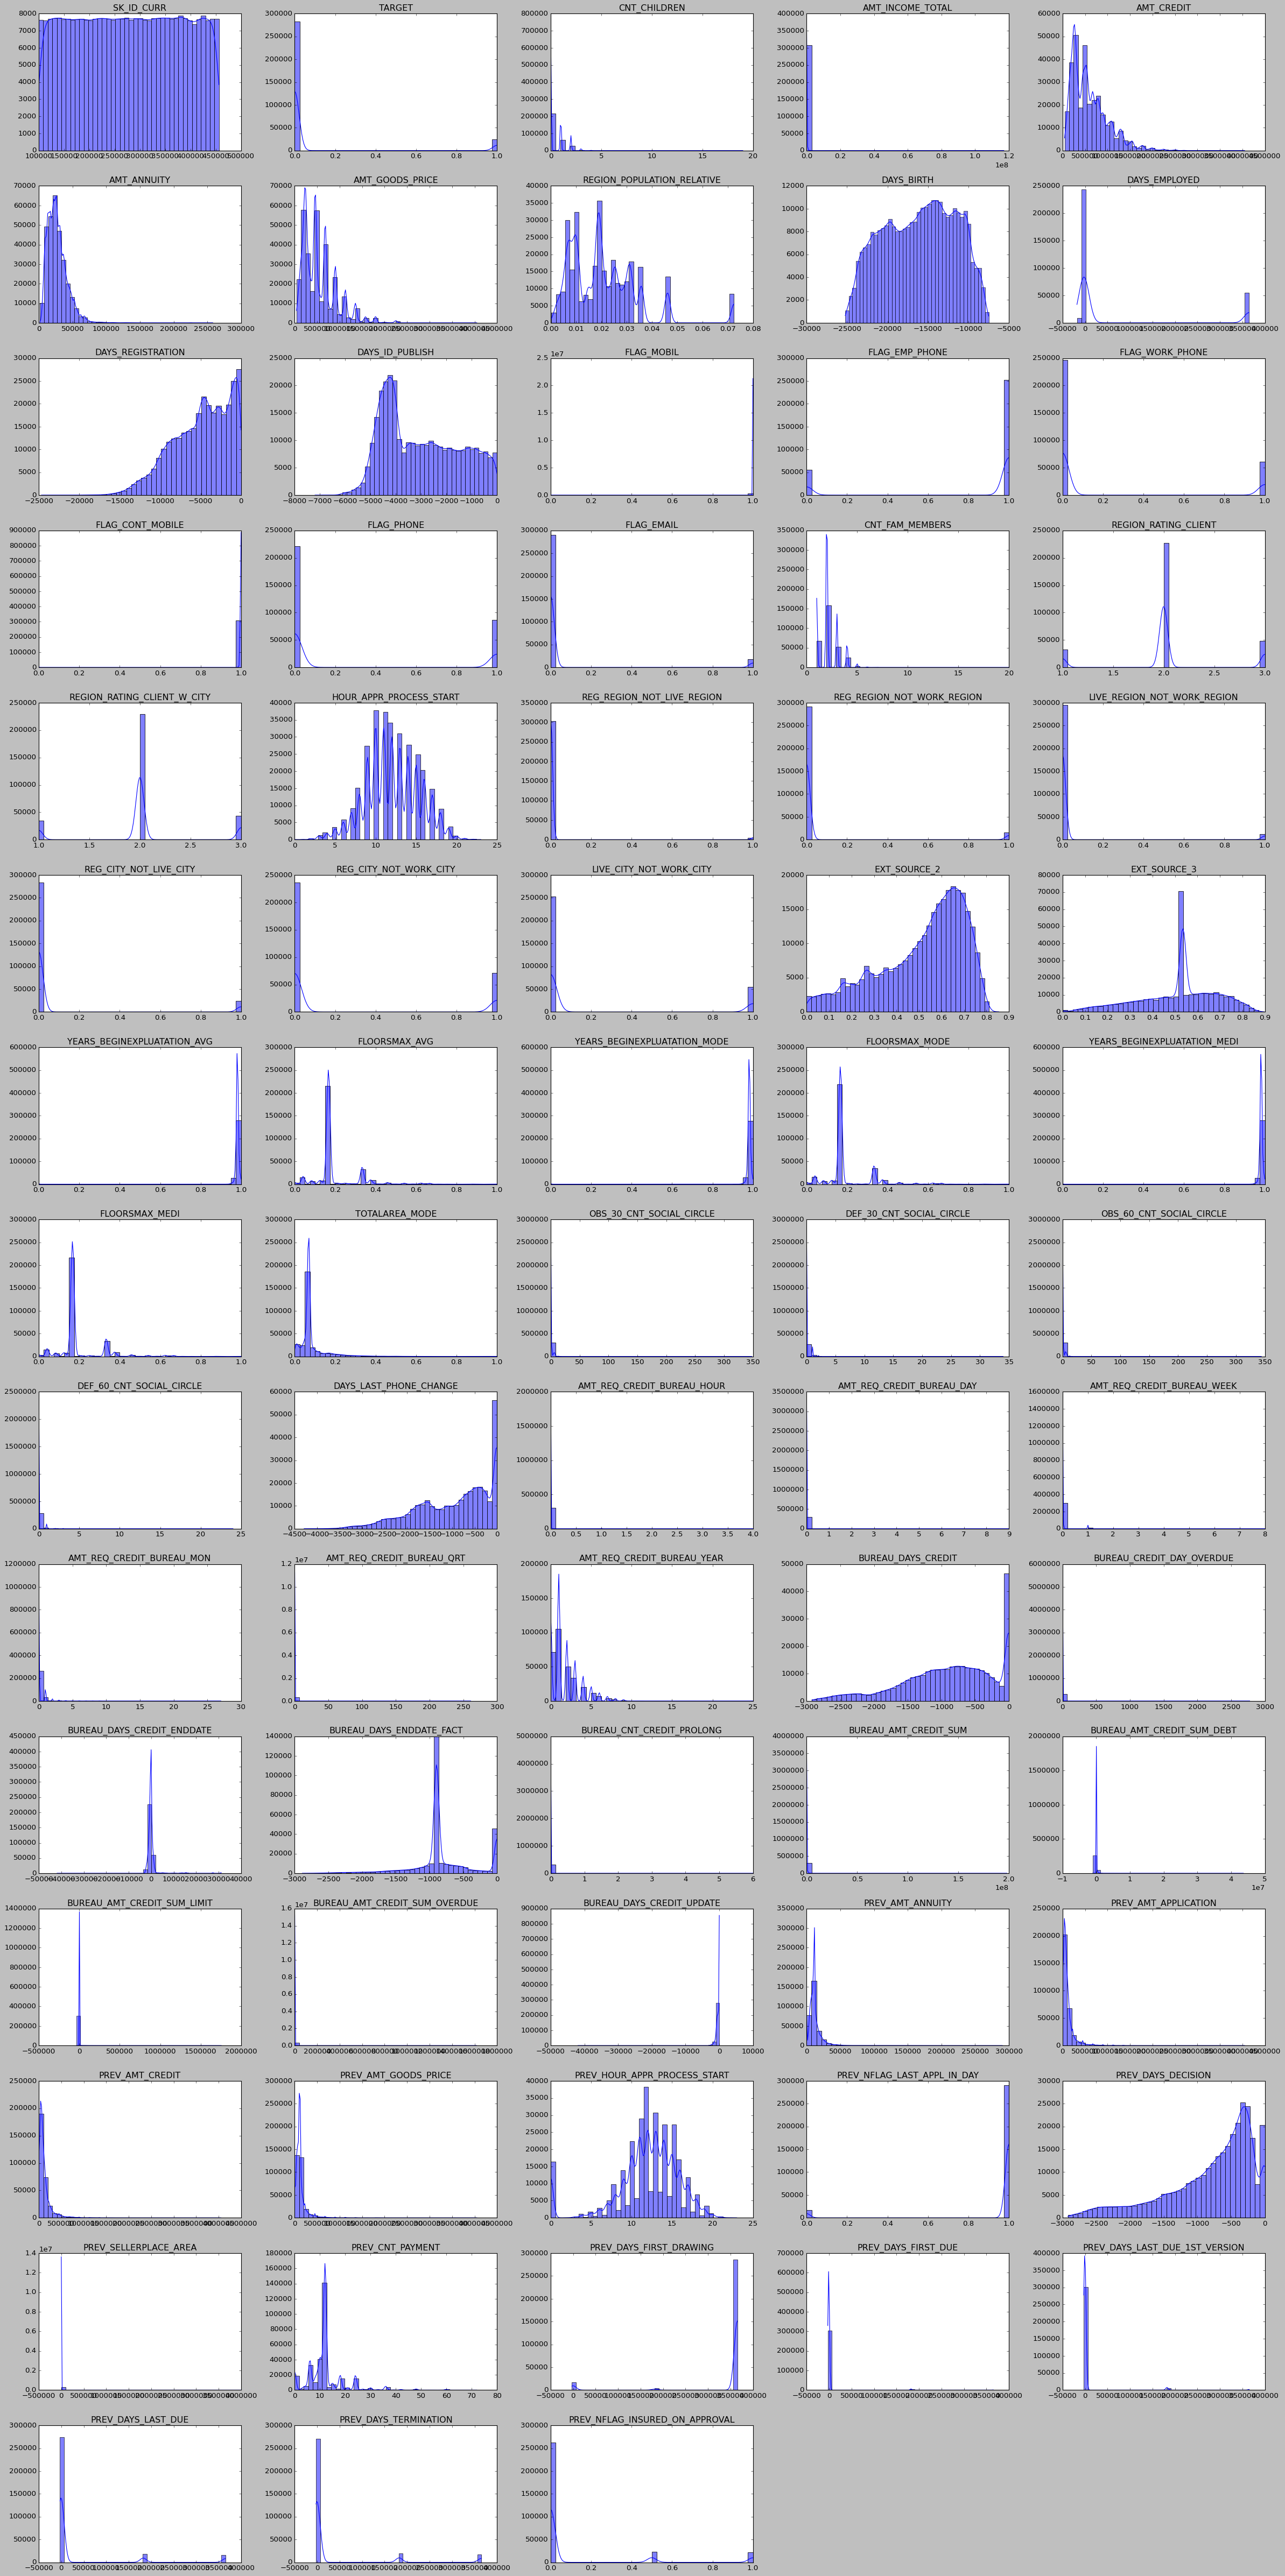

In [8]:
import math

# Jumlah total kolom numerik
n = len(num_cols)

# Tentukan ukuran grid (misal: 3 kolom per baris)
n_cols = 5
n_rows = math.ceil(n / n_cols)

# Ukuran figure besar
plt.figure(figsize=(n_cols*6, n_rows*4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=data_train, x=col, kde=True, bins=40)
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

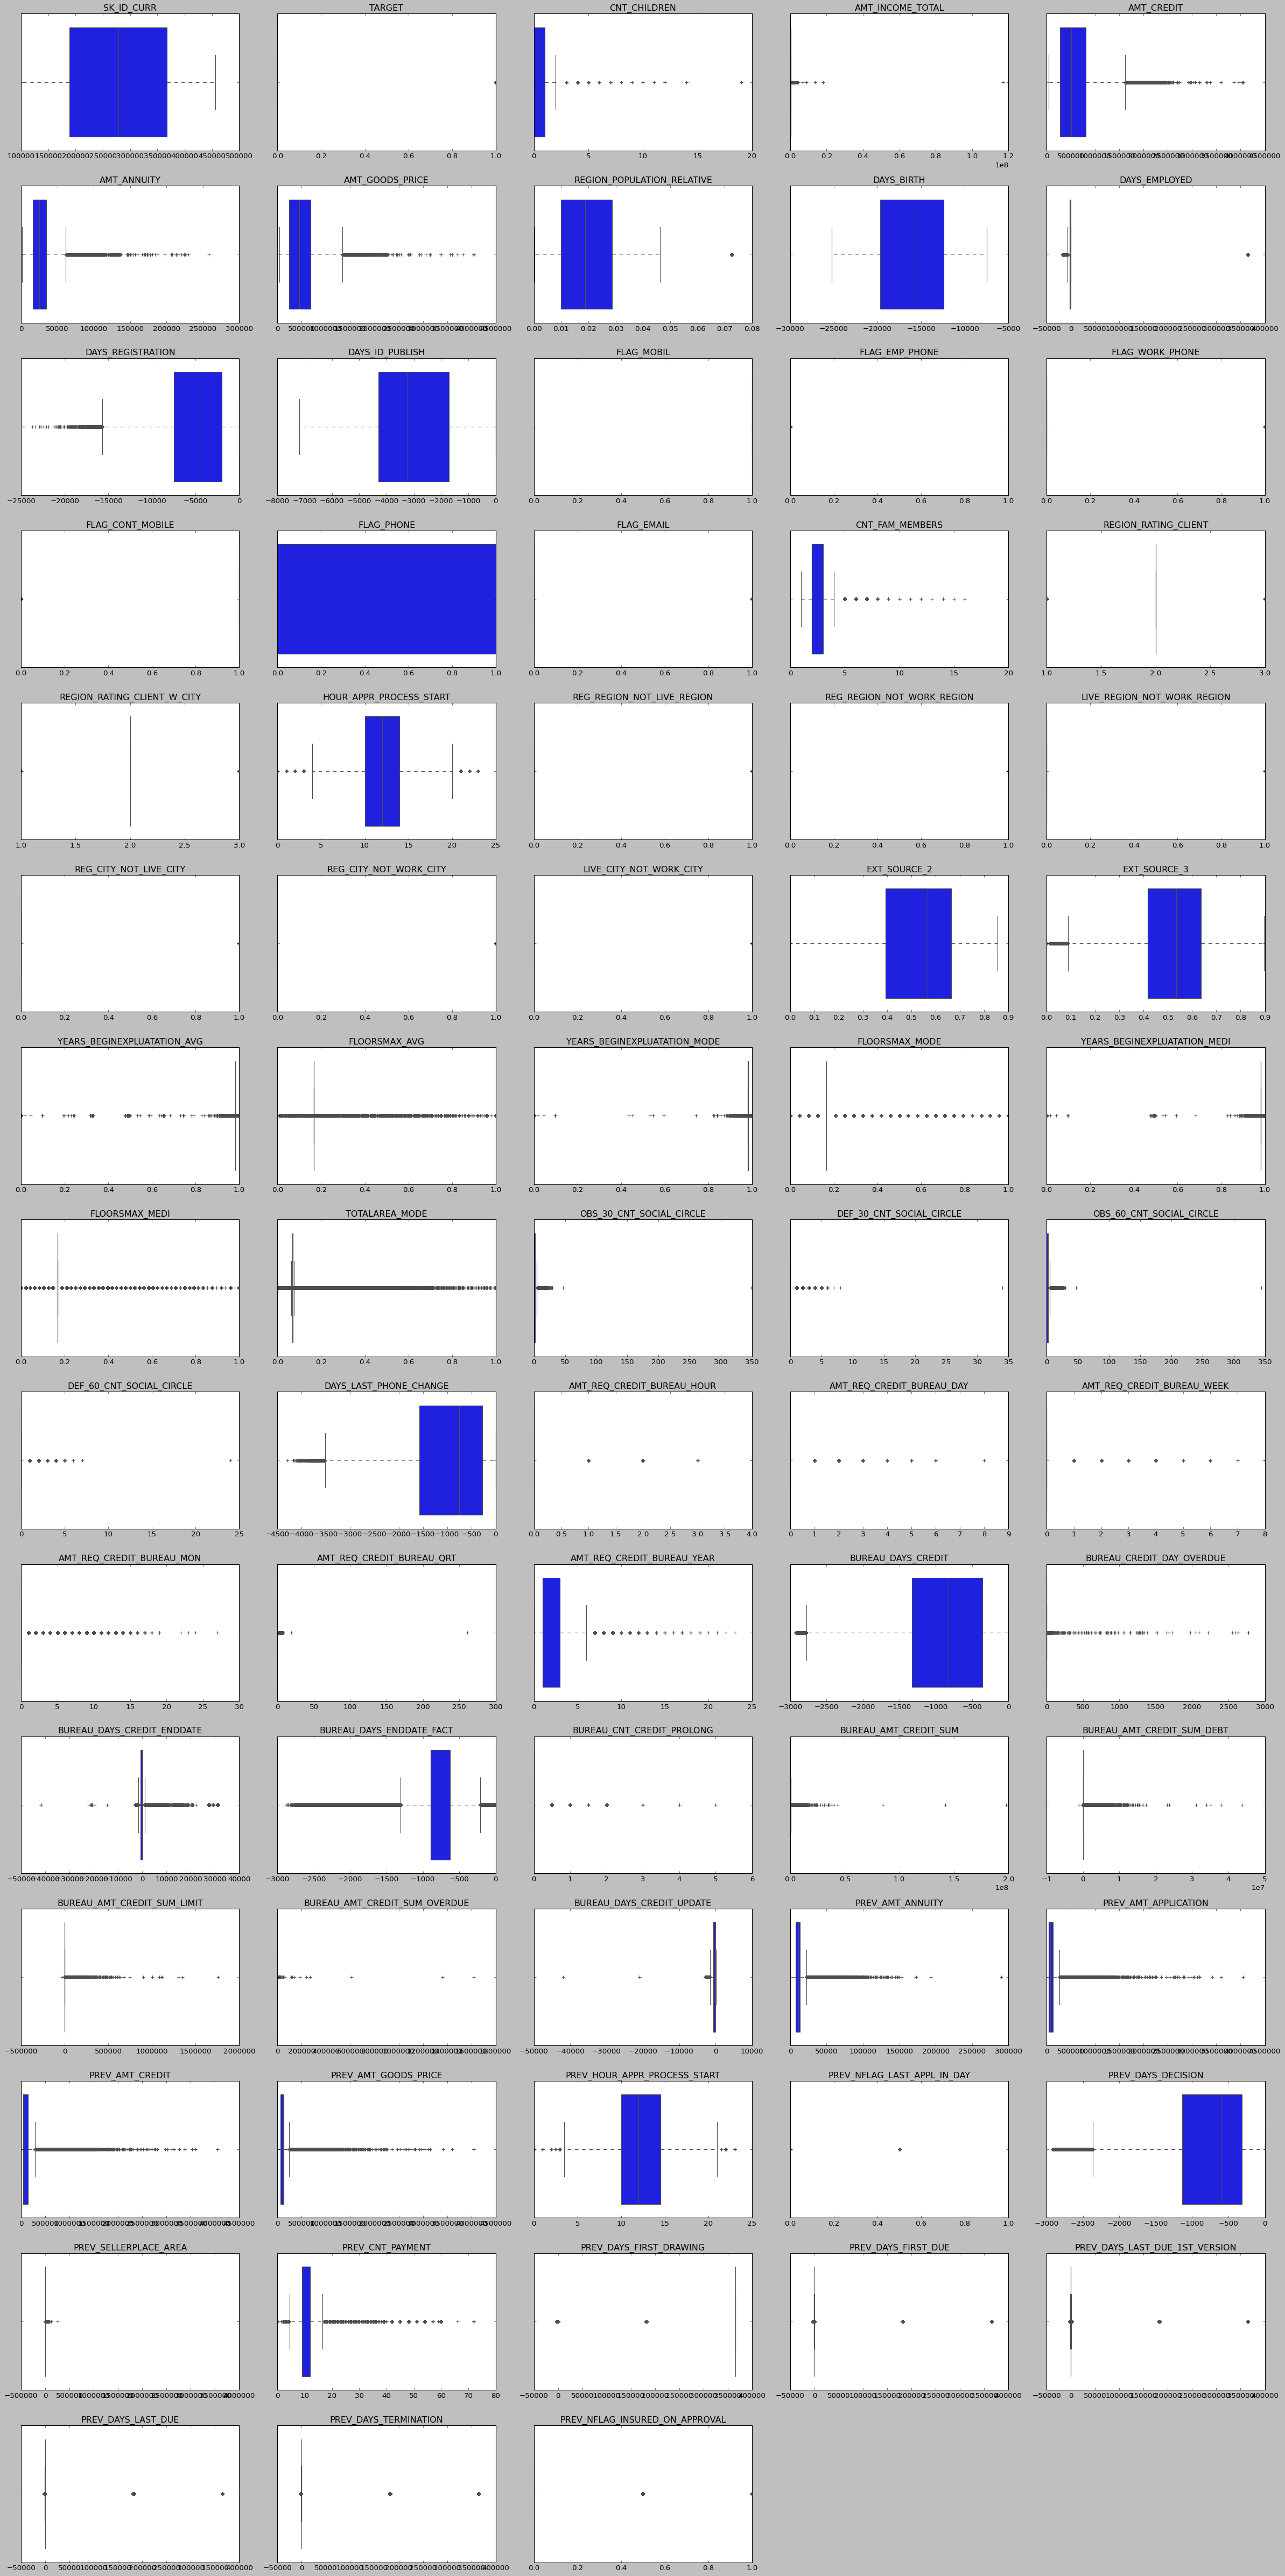

In [9]:
# Ukuran figure besar
plt.figure(figsize=(n_cols*6, n_rows*4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=data_train, x=col)
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### **Correlation Analysis** 💻

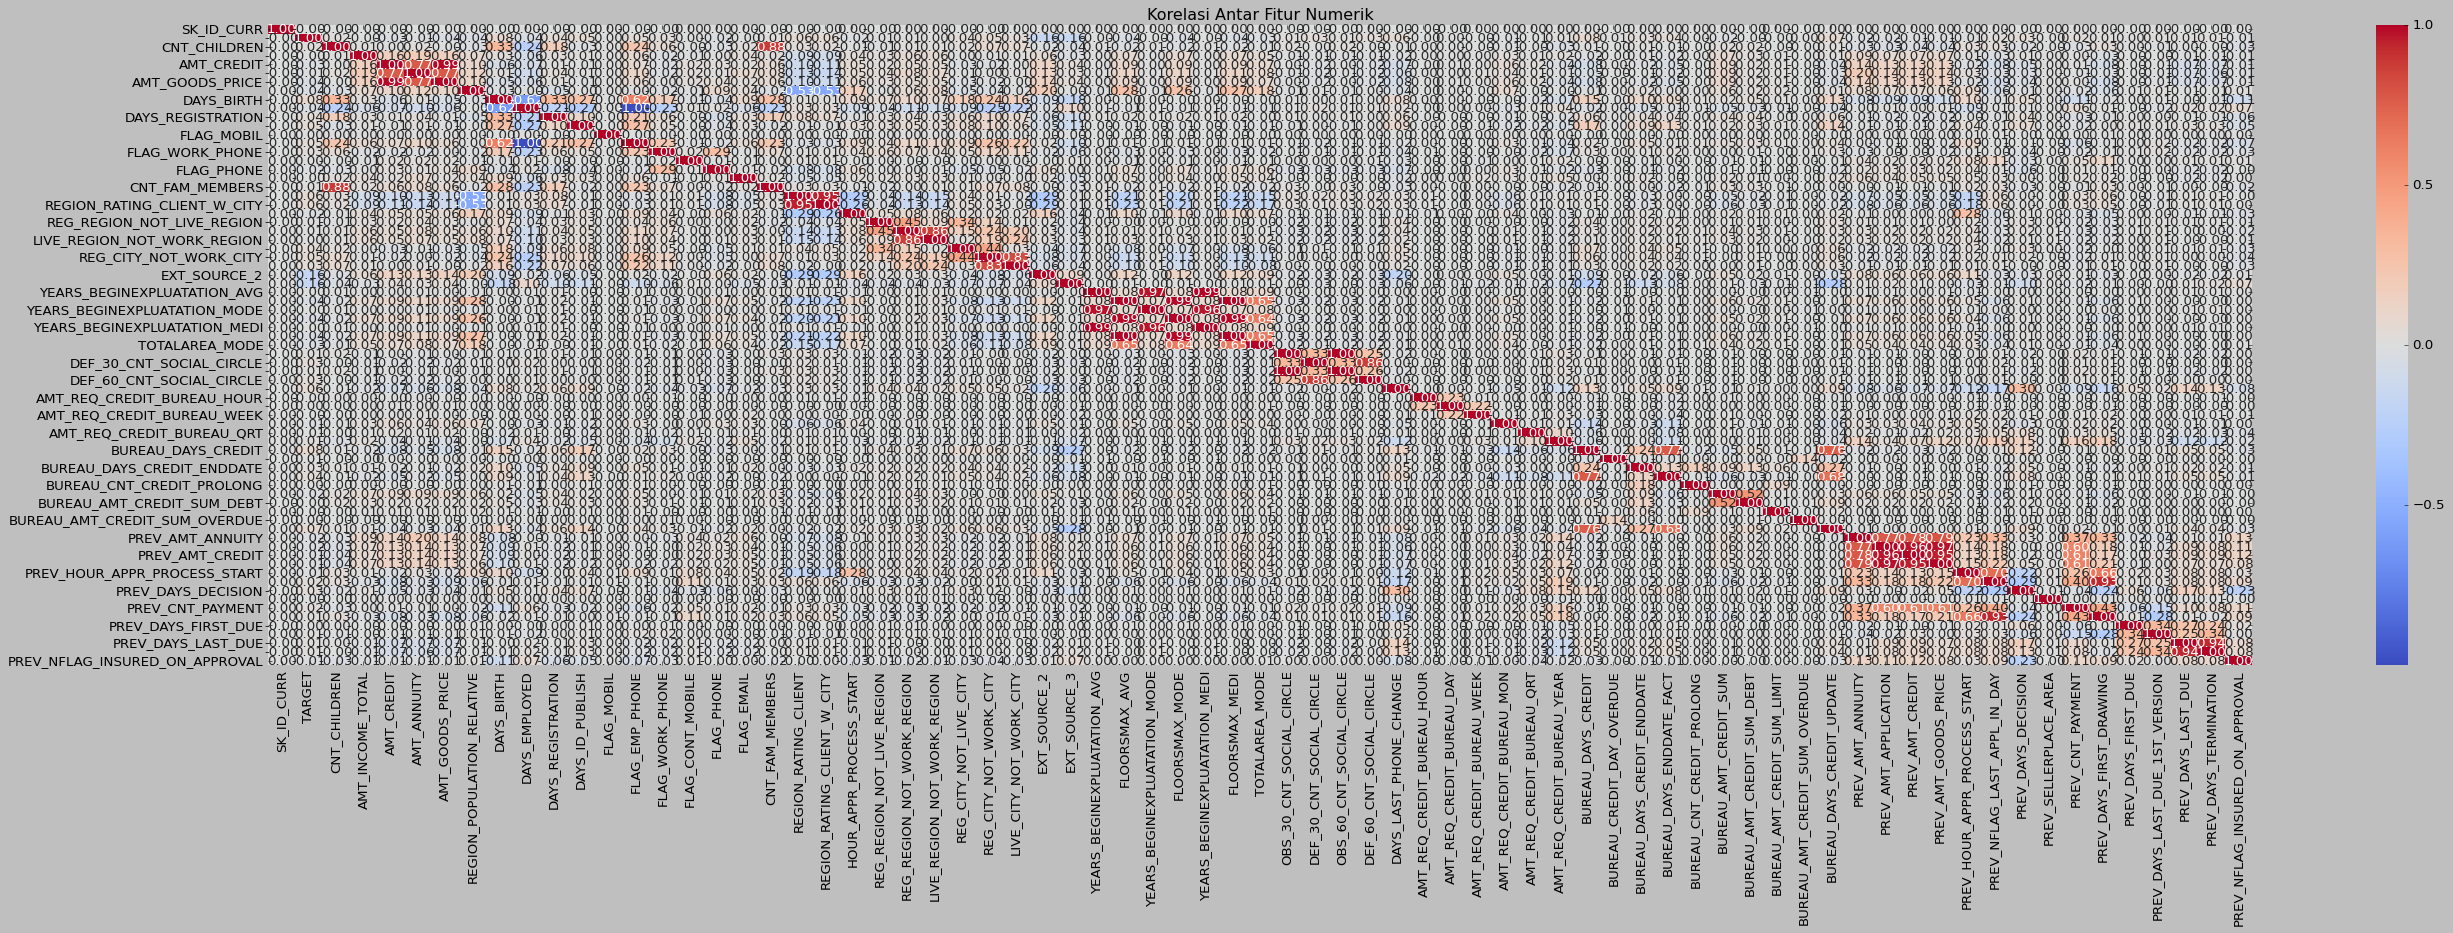

In [11]:
plt.figure(figsize=(40, 10))
sns.heatmap(data_train[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [20]:
corr_target = data_train[num_cols].corr()['TARGET'].sort_values(ascending=False).round(2).reset_index()
corr_target.columns = ["Fitur Numerik", "CORR_WITH_TARGET"]
corr_target[corr_target['CORR_WITH_TARGET'] > 0]

,Fitur Numerik,CORR_WITH_TARGET
0,TARGET,1.00
1,BUREAU_DAYS_CREDIT,0.08
2,DAYS_BIRTH,0.08
3,BUREAU_DAYS_CREDIT_UPDATE,0.07
4,REGION_RATING_CLIENT_W_CITY,0.06
5,REGION_RATING_CLIENT,0.06
6,DAYS_LAST_PHONE_CHANGE,0.06
7,DAYS_ID_PUBLISH,0.05
8,REG_CITY_NOT_WORK_CITY,0.05
9,FLAG_EMP_PHONE,0.05
